In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [130]:
#importando ativos

Ativo1 = pd.read_excel('/content/DadosHistoricos2018_2023.xlsx',sheet_name='PETR3')
Ativo2 = pd.read_excel('/content/DadosHistoricos2018_2023.xlsx',sheet_name='AMZO34')
Ativo3 = pd.read_excel('/content/DadosHistoricos2018_2023.xlsx',sheet_name='COCA34')
Ativo4 = pd.read_excel('/content/DadosHistoricos2018_2023.xlsx',sheet_name='BCSA34')
Ativo5 = pd.read_excel('/content/DadosHistoricos2018_2023.xlsx',sheet_name='M1AA34')
Ativo6 = pd.read_excel('/content/DadosHistoricos2018_2023.xlsx',sheet_name='BOEI34')
Ativo7 = pd.read_excel('/content/DadosHistoricos2018_2023.xlsx',sheet_name='VALE3')
Ativo8 = pd.read_excel('/content/DadosHistoricos2018_2023.xlsx',sheet_name='JNJB34')


In [131]:
print(len(Ativo1))
print(len(Ativo2))
print(len(Ativo3))
print(len(Ativo4))
print(len(Ativo5))
print(len(Ativo6))
print(len(Ativo7))
print(len(Ativo8))

1241
1131
976
826
296
826
1241
1191


In [132]:
## juntando tabelas

df1 = pd.merge(Ativo1, Ativo2, how = 'outer', on = 'DATA')
df2 = pd.merge(Ativo3, Ativo4, how = 'outer', on = 'DATA')
df3 = pd.merge(Ativo5, Ativo6, how = 'outer', on = 'DATA')
df4 = pd.merge(Ativo7, Ativo8, how = 'outer', on = 'DATA')

df1 = pd.merge(df1, df2, how = 'outer', on = 'DATA')
df2 = pd.merge(df3, df4, how = 'outer', on = 'DATA')

df = pd.merge(df1, df2, how = 'outer', on = 'DATA')

In [133]:
df.describe()

,PETR3,AMZO34,COCA34,BCSA34,M1AA34,BOEI34,VALE3,JNJB34
count,1241.000000,1131.000000,976.000000,826.000000,296.000000,826.000000,1241.000000,1191.000000
mean,23.539041,31.120124,44.187746,16.304831,233.642297,1079.613305,57.825786,48.312107
std,6.788887,11.437981,9.078355,3.159572,39.219521,229.554503,21.690507,11.461195
min,10.520000,12.630000,22.590000,10.000000,152.050000,508.000000,25.470000,26.450000
25%,17.130000,19.095000,39.372500,13.430000,206.760000,902.690000,37.350000,34.990000
50%,24.800000,30.690000,46.260000,16.515000,225.245000,1112.600000,48.360000,52.890000
75%,29.080000,42.660000,51.492500,19.150000,257.165000,1232.235000,78.120000,57.885000
max,41.560000,51.810000,57.460000,22.280000,325.760000,1633.680000,98.000000,64.910000


In [134]:
df.columns

Index(['DATA', 'PETR3', 'AMZO34', 'COCA34', 'BCSA34', 'M1AA34', 'BOEI34',
       'VALE3', 'JNJB34'],
      dtype='object')

In [135]:
df.head()

,DATA,PETR3,AMZO34,COCA34,BCSA34,M1AA34,BOEI34,VALE3,JNJB34
0,20.04.2023,29.96,26.27,53.75,19.86,187.72,NaN,75.95,54.77
1,19.04.2023,29.73,26.43,54.00,19.94,190.85,NaN,76.25,54.93
2,18.04.2023,30.71,25.36,52.51,19.57,NaN,NaN,78.54,53.32
3,17.04.2023,29.94,25.28,52.04,19.55,184.77,1009.61,77.87,54.40
4,14.04.2023,29.82,25.10,51.51,19.14,184.50,993.00,78.81,54.16


In [175]:
# pegando apenas os valores
df_valores = df.loc[:,['PETR3', 'AMZO34', 'COCA34', 'BCSA34', 'M1AA34', 'BOEI34','VALE3', 'JNJB34']]

In [176]:
# Calcular os retornos diários dos ativos financeiros a partir dos preços históricos:
retornos = df_valores.pct_change().dropna()

In [177]:
retornos

,PETR3,AMZO34,COCA34,BCSA34,M1AA34,BOEI34,VALE3,JNJB34
4,-0.004008,-0.007120,-0.010184,-0.020972,-0.001461,-0.016452,0.012071,-0.004412
5,-0.014755,0.000797,0.008736,-0.016196,-0.006829,0.050493,0.008882,0.005724
6,-0.011572,-0.040605,0.000385,0.000531,0.000000,0.007784,0.013709,-0.012668
7,-0.000689,0.036515,0.008657,-0.012739,0.029633,0.010701,0.021836,0.022685
8,-0.042040,0.030424,0.011635,0.026882,0.000000,0.013901,-0.050146,0.005455
...,...,...,...,...,...,...,...,...
1236,-0.002893,-0.034483,0.000000,0.000000,0.000000,0.000000,0.007310,0.000000
1237,-0.038956,-0.034195,-0.005284,0.000000,0.000000,0.023278,-0.015385,0.004031
1238,0.032773,-0.006294,0.003099,0.000000,0.000000,0.000000,0.007370,-0.023358
1239,0.003340,0.000000,0.012357,0.000000,0.000000,0.000000,-0.016681,0.001868


In [178]:
# Calcular a matriz de covariância dos retornos:
covariancia = retornos.cov()

In [179]:
# função objetivo para minimizar a variância da carteira, dada uma taxa de retorno desejada:
def funcao_objetivo(pesos, covariancia, retorno_esperado):
    variancia = np.dot(pesos.T, np.dot(covariancia, pesos))
    penalidade = 10000 * abs(retorno_esperado - np.dot(pesos.T, retornos.mean()))
    return variancia + penalidade

In [186]:
# Definir um valor de retorno esperado desejado e otimizar a alocação de ativos usando a função minimize do pacote SciPy:
retorno_esperado = 0.05 # exemplo de retorno esperado de 0.05%
pesos_iniciais = np.ones((len(retornos.columns))) / len(retornos.columns) # alocação inicial igual para todos os ativos
limites = [(0.05,1) for i in range(len(retornos.columns))] # limites de alocação entre 5% e 100%
otimizacao = minimize(funcao_objetivo, pesos_iniciais, args=(covariancia, retorno_esperado), bounds=limites, constraints=[{'type': 'eq', 'fun': lambda x: np.sum(x)-1}])

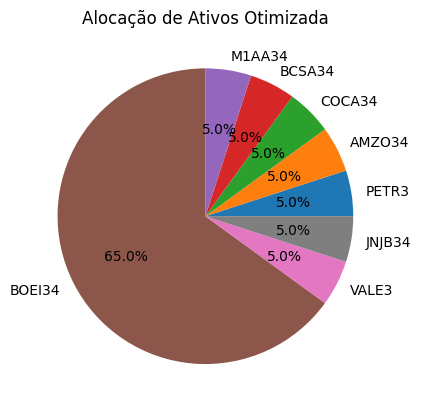

In [187]:
pesos_otimizados = otimizacao.x
fig, ax = plt.subplots()
ax.pie(pesos_otimizados, labels=retornos.columns, autopct='%1.1f%%')
ax.set_title('Alocação de Ativos Otimizada')
plt.show()